# Explore Facial Images
This notebook includes data cleaning, data exploration and preprocessing (resizing, padding, conversion to grayscale) of the face images.

---

### Content:

- **1) Load Packages & Data**
- **2) Image Resizing**
     - a) Image Size
     - b) Resize by stretching/squeezing
     - c) Resize by padding
     - d) Resize to square dimensions
- **3) Pixel Value Distributions**
     - a) Plot distributions
     - b) Mean-centering and scaling
- **4) Conversion to Grayscale**

---

# 1) Load Packages & Data

In [2]:
# lead basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import matplotlib.image as mpimg

sns.set_style("white")
pd.options.display.max_columns = 100

In [3]:
# load average ratings from csv-file

data_dir = '/Users/kacha/nf-ds/nf_capstone/10k_US_Data/'
df_ratings = pd.read_csv(data_dir + 'df_ratings.csv')
df_ratings.head(3)

,filename,imageID,trustworthy,attractive,friendly,intelligent,calm,caring,interesting,stable,memorable,confident,typical,emotional,common,happy,humble,responsible,sociable,familiar,kind,normal,untrustworthy,unattractive,unfriendly,unintelligent,aggressive,cold,boring,unstable,forgettable,uncertain,atypical,unemotional,uncommon,unhappy,egoistic,irresponsible,introverted,unfamiliar,mean,weird
0,Google_1_Danielle Goble_5_oval.jpg,1,5.33,4.87,4.33,5.60,6.29,4.67,4.13,5.80,4.40,5.67,5.40,3.67,5.53,3.80,4.73,5.80,4.67,4.00,5.00,5.93,3.67,4.40,4.60,3.33,4.80,4.13,6.00,3.20,4.93,4.27,3.93,4.47,4.67,3.73,3.67,3.53,5.13,4.07,4.53,3.93
1,Google_1_Phillip Owensby_9_oval.jpg,2,6.73,4.73,6.73,6.60,6.47,6.93,4.93,7.07,4.40,6.53,5.73,5.80,5.93,7.13,6.13,7.47,6.60,4.27,7.00,7.33,2.60,3.27,1.87,2.67,3.13,2.07,3.87,2.13,4.60,2.60,2.93,2.07,2.60,2.00,2.20,2.20,2.60,3.27,2.53,1.67
2,Google_1_Douglas Ziegler_3_oval.jpg,3,6.40,4.60,6.67,6.47,6.67,6.07,4.80,6.20,4.73,6.07,5.93,5.14,5.73,6.73,5.67,6.67,6.67,4.40,6.47,6.20,2.73,3.87,2.60,2.73,2.40,3.20,4.20,2.93,4.27,3.27,2.87,2.87,3.33,2.93,3.60,2.47,3.40,3.80,2.53,3.20


In [4]:
# make dictionary to store image IDs and corresponding filenames

img_dict = {ID: file for (ID, file) in zip(df_ratings.imageID.unique(), df_ratings.filename.unique())}
len(img_dict)

2222

In [5]:
# do the same for publication-friendly subset of the face dataset to be able to show output in GitHub

data_dir_public = ('/Users/kacha/nf-ds/nf_capstone/10k_US_Data/'
                   'Publication Friendly 49-Face Database/Attribute Scores/psychology attributes/')
df_public = pd.read_csv(data_dir_public + 'psychology_attributes_Mean.csv')
img_dict_public = {ID: file for (ID, file) in zip(df_public['Image #'].unique(), df_public.Filename.unique())}
len(img_dict_public)

49

In [ ]:
# copy only images for which we have ratings in a new folder --> only needs to be done once!

''' 
import os
import shutil

source_path = '/Users/kacha/nf-ds/nf_capstone/10k_US_Data/10k US Adult Faces Database/Face Images/'
dest_path = '/Users/kacha/nf-ds/nf_capstone/10k_US_Data/10k US Adult Faces Database/Face_Images_with_ratings/'

for i in range(len(img_dict)):
    print("\r", "Progress {:2.1%}".format((i+1) / len(img_dict)), end="")
    source_file = source_path + img_dict[i+1]
    _ = shutil.copy2(source_file, dest_path)   # copies the source file to the destination file or directory
''';

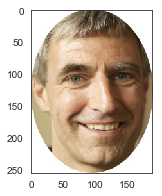

In [6]:
# display example image (use publication-friendly images)

img_dir = '/Users/kacha/nf-ds/nf_capstone/10k_US_Data/10k US Adult Faces Database/Face_Images_with_ratings/'
img_dir_public = ('/Users/kacha/nf-ds/nf_capstone/10k_US_Data/'
                   'Publication Friendly 49-Face Database/49 Face Images/')

fig, ax = plt.subplots(figsize=(5,3))
img = mpimg.imread(img_dir_public + img_dict_public[5])
plt.imshow(img);

---
# 2) Image Resizing

### a) Image Size

In [ ]:
#!pip install --upgrade scipy

Image heights from 256.0 to 256.0, image widths from 153.0 to 257.0.


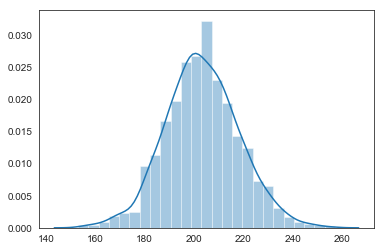

In [7]:
# test if all images have the same shape

img_widths = np.zeros(len(img_dict))
img_heights = np.zeros(len(img_dict))

for i in range(len(img_dict)):
    img = mpimg.imread(img_dir + img_dict[i+1])
    img_heights[i] = img.shape[0]
    img_widths[i] = img.shape[1]
        
sns.distplot(img_widths, bins=25)
print('Image heights from {} to {}, image widths from {} to {}.'.format(img_heights.min(), img_heights.max(), 
                                                                        img_widths.min(), img_widths.max()))

In [15]:
#resize single image that has not height of 256 and replace in folder > only needs to be done once
'''
# only one images seems not to have height = 256 > let's change this

#idx_not_256 = np.where(img_heights != 256)[0][0]  # img_heights.argmax() = 1621
#file_not_256 = img_dict[img_heights.argmax()+1]   #'Arthur_Pagano_19_oval.jpg'

# lets check the size of this picture and plot it

#img = mpimg.imread(img_path + img_dict[idx_not_256+1])
#plt.imshow(img)
#plt.title(img.shape);
#plt.show()

# let's resize this picture and overwrite the original one

#img_resized = resize(img, (target_size[0], 
#                     int(img.shape[1] * (target_size[0] / img.shape[0])),  # resize image-width accordingly 
#                     target_size[2]), anti_aliasing=True)
#plt.imshow(img_resized)
#plt.title(img_resized.shape);
#plt.show()

# from imageio import imwrite
# imwrite(img_path + 'file_not_256,img_resized)
''';

### b) Resize by stretching/squeezing

In [8]:
# Initialize X array for image pixel values (N * D with N=number of images, D=dimensions of each image)
# see: https://github.com/AdityaKansal/Machine-Learning-Kaggle/blob/master/Whale_Identification/Image_Pre_Processing

n_images = len(img_dict)
target_size = (256, 200, 3)

X_resized = np.zeros((n_images, target_size[0], target_size[1], target_size[2]))
X_resized.shape

(2222, 256, 200, 3)

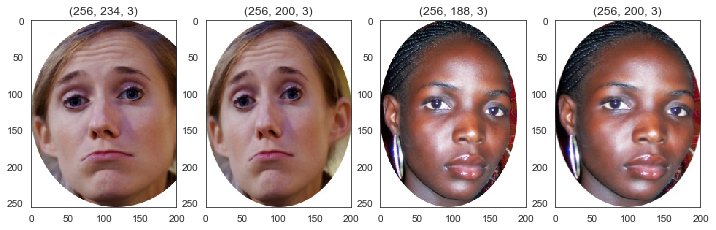

In [9]:
# Show resizing by stretching/squeezing for two example images (from publication-friendly data)

#!pip install scikit-image
from skimage.transform import resize

fig, ax = plt.subplots(1,4, figsize=(12,5))
ind_stretch = 19
idx_squeeze = 7

ax1 = plt.subplot(141)
img = plt.imread(img_dir_public + img_dict_public[idx_squeeze])  
plt.imshow(img)
plt.title(img.shape);

plt.subplot(142, sharex=ax1)
img = resize(img, target_size, anti_aliasing=True)
plt.imshow(img)
plt.title(img.shape);

plt.subplot(143, sharex=ax1)
img = plt.imread(img_dir_public + img_dict_public[ind_stretch])  
plt.imshow(img)
plt.title(img.shape);

plt.subplot(144, sharex=ax1)
img = resize(img, target_size, anti_aliasing=True)
plt.imshow(img)
plt.title(img.shape);

In [10]:
# write function for resizing images to target size

def resize_image(img_file, target_size):
    img = plt.imread(img_file)                           # reading each image
    img = resize(img, target_size, anti_aliasing=True)   # resizing each image
    return img

In [27]:
# do resizing of all images

for i in range(n_images):
    img_array = resize_image(img_dir + img_dict[i+1], target_size)
    X_resized[i] = img_array
    print("\r", "Progress {:2.1%}".format((i+1) / n_images), end="")

 Progress 100.0%

In [11]:
# do the same for publication-friendly images for demonstration

n_images_public = len(img_dict_public)
target_size = (256, 200, 3)

X_resized_public = np.zeros((n_images_public, target_size[0], target_size[1], target_size[2]))

for i in range(n_images_public):
    img_array = resize_image(img_dir_public + img_dict_public[i+1], target_size)
    X_resized_public[i] = img_array
    print("\r", "Progress {:2.1%}".format((i+1) / n_images_public), end="")

 Progress 100.0%

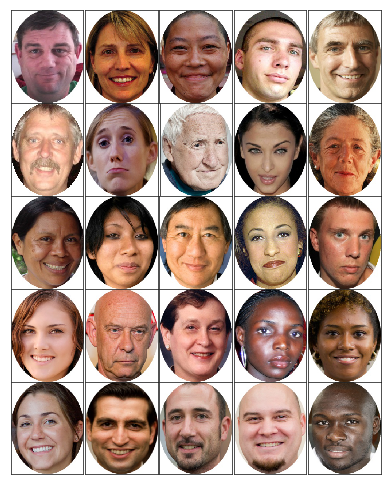

In [12]:
# grid view after resizing

plot_n = 25
grid_dim = np.int(np.sqrt(plot_n))

fig, ax = plt.subplots(grid_dim, grid_dim, figsize=( 200/(grid_dim*6), 256/(grid_dim*6) ))
plt.subplots_adjust(hspace=0, wspace=0)

for i in range(plot_n):
    plt.subplot(grid_dim, grid_dim, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_resized_public[i])

In [14]:
# save results
save_path = '/Users/kacha/nf-ds/nf_capstone/data/'
np.save(save_path + 'Xr.npy', X_resized)
np.save(save_path + 'Xr_public.npy', X_resized_public)

### c) Resize by padding

In [15]:
# first find image with largest width

max_width = img_widths.max()
max_width

257.0

In [16]:
# Initialize X array for image pixel values (N * D with N=number of images, D=dimensions of each image)

target_size = (256, int(max_width), 3)

X_padded = np.zeros((n_images, target_size[0], target_size[1], target_size[2]))
X_padded.shape

(2222, 256, 257, 3)

In [17]:
# write function for left/right padding of image

def pad_image(img_file, target_size):
    
    img = plt.imread(img_file)                   # reading each image
    width_diff = (target_size[1] - img.shape[1])
    left_padding =  width_diff // 2
    right_padding = width_diff - left_padding
    
    d1 = np.concatenate((255*np.ones((target_size[0],left_padding)), img[:,:,0], 
                         255*np.ones((target_size[0],right_padding))), axis=1)
    d2 = np.concatenate((255*np.ones((target_size[0],left_padding)), img[:,:,1], 
                         255*np.ones((target_size[0],right_padding))), axis=1)
    d3 = np.concatenate((255*np.ones((target_size[0],left_padding)), img[:,:,2], 
                         255*np.ones((target_size[0],right_padding))), axis=1)
    img_padded = np.dstack((d1.astype(int), d2.astype(int), d3.astype(int)))
    
    return img_padded

In [14]:
# do padding for all images

for i in range(n_images):
    img_padded = pad_image(img_dir + img_dict[i+1], target_size)
    X_padded[i] = img_padded/255
    print("\r", "Progress {:2.1%}".format(i / n_images), end="")

 Progress 100.0%

In [18]:
# do the same for publication-friendly images for demonstration

target_size_public = (256, 259, 3)
X_padded_public = np.zeros((n_images, target_size_public[0], target_size_public[1], target_size_public[2]))

for i in range(n_images_public):
    img_padded = pad_image(img_dir_public + img_dict_public[i+1], target_size_public)
    X_padded_public[i] = img_padded/255
    print("\r", "Progress {:2.1%}".format((i+1) / n_images_public), end="")

 Progress 100.0%

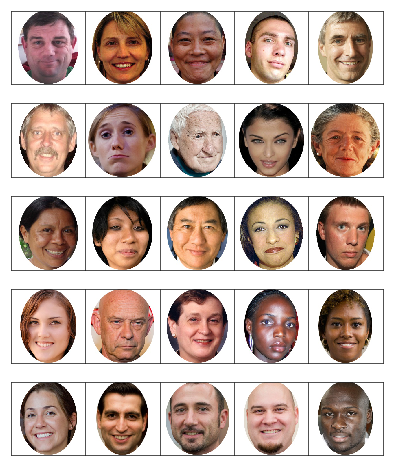

In [19]:
# grid view after padding (with publication-friendly images)

plot_n = 25
grid_dim = np.int(np.sqrt(plot_n))

fig, ax = plt.subplots(grid_dim, grid_dim, figsize=( 200/(grid_dim*6), 256/(grid_dim*6) ))
plt.subplots_adjust(hspace=0, wspace=0)

for i in range(plot_n):
    plt.subplot(grid_dim, grid_dim, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_padded_public[i])

In [20]:
save_path = '/Users/kacha/nf-ds/nf_capstone/data/'
np.save(save_path + 'Xp.npy', X_padded)
np.save(save_path + 'Xp_public.npy', X_padded_public)

### c) Resize to square dimensions

In [21]:
# resize these padded images so that they are 256*256

target_size = (256, 256, 3)
X_square = np.zeros((n_images, target_size[0], target_size[1], target_size[2]))
X_square.shape

(2222, 256, 256, 3)

In [19]:
# apply resizing to all images

for i in range(n_images): 
    X_square[i] = resize(X_padded[i], target_size, anti_aliasing=True)
    print("\r", "Progress {:2.1%}".format((i+1) / n_images), end="")

 Progress 100.0%

In [22]:
# do the same for publication-friendly images for demonstration

X_square_public = np.zeros((n_images_public, target_size[0], target_size[1], target_size[2]))

for i in range(n_images_public): 
    X_square_public[i] = resize(X_padded_public[i], target_size, anti_aliasing=True)
    print("\r", "Progress {:2.1%}".format((i+1) / n_images_public), end="")

 Progress 100.0%

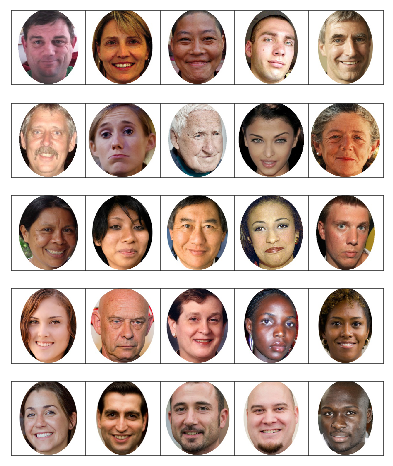

In [23]:
# grid view after padding and making pictures squared (with publication-friendly images)

plot_n = 25
grid_dim = np.int(np.sqrt(plot_n))

fig, ax = plt.subplots(grid_dim, grid_dim, figsize=( 200/(grid_dim*6), 256/(grid_dim*6) ))
plt.subplots_adjust(hspace=0, wspace=0)

for i in range(plot_n):
    plt.subplot(grid_dim, grid_dim, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_square_public[i])

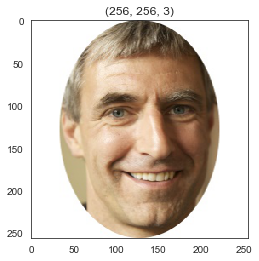

In [24]:
# show shape for one example image
plt.imshow(X_square_public[4])
plt.title(X_square_public[4].shape);

In [25]:
# save results
save_path = '/Users/kacha/nf-ds/nf_capstone/data/'
np.save(save_path + 'Xs.npy', X_square)
np.save(save_path + 'Xs_public.npy', X_square_public)

---
# 3) Pixel Value Distributions

### a) Plot distributions

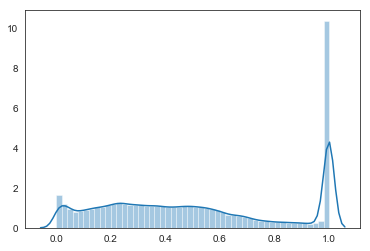

In [28]:
# check distribution of pixel values (for first 10 images)

X = X_resized.copy()
sns.distplot(X[:10].ravel(), bins=50);

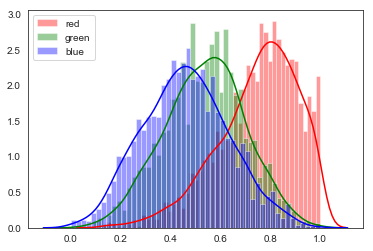

In [31]:
# plot pixel value distribution for some pixel in the center of the picture

sns.distplot(X[:,128,100,0], bins=50, color='red');
sns.distplot(X[:,128,100,1], bins=50, color='green');
sns.distplot(X[:,128,100,2], bins=50, color='blue');
plt.legend(['red','green','blue'], loc='upper left');

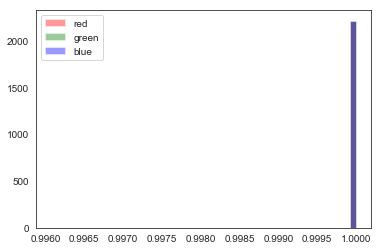

In [32]:
# Note: for border pixels, distributions are different (all white)

sns.distplot(X[:,0,0,0], bins=50, color='red', kde=False);
sns.distplot(X[:,0,0,1], bins=50, color='green', kde=False);
sns.distplot(X[:,0,0,2], bins=50, color='blue', kde=False);
plt.legend(['red','green','blue'], loc='upper left');

### b) Mean-centering and scaling

In [33]:
# get mean and sd for each pixel for mean-centering and standardization
# see: http://cs231n.github.io/neural-networks-2/#datapre

X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis = 0)

X_mean.shape, X_std.shape

((256, 200, 3), (256, 200, 3))

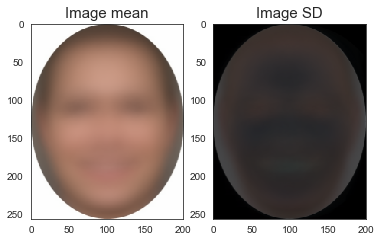

In [34]:
# Plot images mean and SD

plt.subplot(121)
plt.imshow(X_mean)
plt.title('Image mean', size=15);

plt.subplot(122)
plt.imshow(X_std)
plt.title('Image SD', size=15);

In [35]:
# mean-center the images

X_centered = X - X_mean
X_centered.shape

(2222, 256, 200, 3)

In [36]:
# standardize the images

X_scaled = X_centered / X_std
X_scaled.shape

(2222, 256, 200, 3)

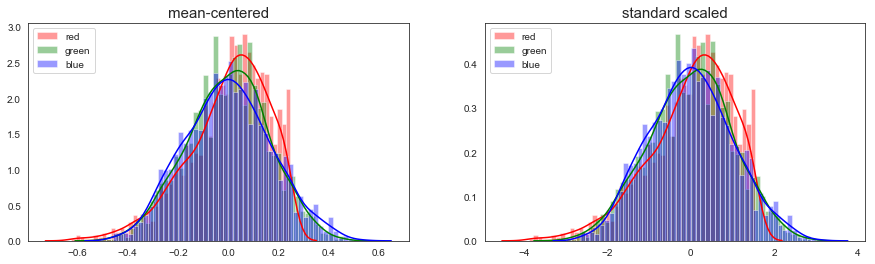

In [37]:
# after centering and scaling: plot pixel value distribution for some pixel in the center of the picture

fig, ax = plt.subplots(1,2,figsize=(15,4))

plt.subplot(121)
sns.distplot(X_centered[:,128,100,0], bins=50, color='red');
sns.distplot(X_centered[:,128,100,1], bins=50, color='green');
sns.distplot(X_centered[:,128,100,2], bins=50, color='blue');
plt.legend(['red','green','blue'], loc='upper left')
plt.title('mean-centered', size=15);

plt.subplot(122)
sns.distplot(X_scaled[:,128,100,0], bins=50, color='red');
sns.distplot(X_scaled[:,128,100,1], bins=50, color='green');
sns.distplot(X_scaled[:,128,100,2], bins=50, color='blue');
plt.legend(['red','green','blue'], loc='upper left')
plt.title('standard scaled', size=15);

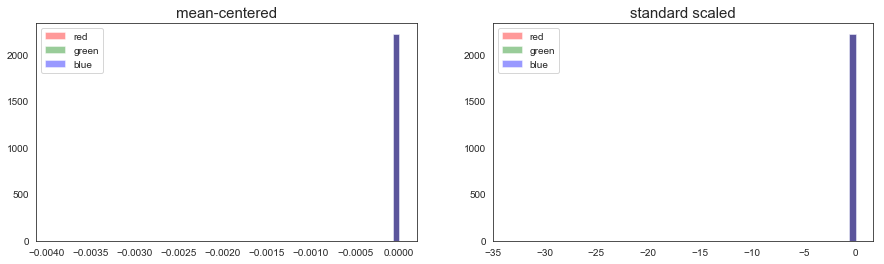

In [38]:
# after centering and scaling: plot pixel value distribution for some pixel at border of the picture

fig, ax = plt.subplots(1,2,figsize=(15,4))

plt.subplot(121)
sns.distplot(X_centered[:,0,0,0], bins=50, color='red', kde=False);
sns.distplot(X_centered[:,0,0,1], bins=50, color='green', kde=False);
sns.distplot(X_centered[:,0,0,2], bins=50, color='blue', kde=False);
plt.legend(['red','green','blue'], loc='upper left')
plt.title('mean-centered', size=15);

plt.subplot(122)
sns.distplot(X_scaled[:,0,0,0], bins=50, color='red', kde=False);
sns.distplot(X_scaled[:,0,0,1], bins=50, color='green', kde=False);
sns.distplot(X_scaled[:,0,0,2], bins=50, color='blue', kde=False);
plt.legend(['red','green','blue'], loc='upper left')
plt.title('standard scaled', size=15);

---
# 4) Conversion to Grayscale

In [27]:
# initialize X matrix for grayscale images

from PIL import Image

target_size = (256, 200, 3)
X_resized_gray = np.zeros((n_images, target_size[0], target_size[1], target_size[2]))
X_resized_gray.shape

(2222, 256, 200, 3)

In [28]:
# write function to convert images to grayscale
# see: https://stackoverflow.com/questions/3823752/display-image-as-grayscale-using-matplotlib

def convert_to_grayscale(img_file, target_size):
    image = Image.open(img_file).convert('L')            # convert each image to grayscale
    img = np.asarray(image)/255
    img = resize(img, target_size, anti_aliasing=True)   # resizing each image
    return img

In [29]:
# do conversion to grayscale for all images

for i in range(n_images):
    img_array = convert_to_grayscale(img_dir + img_dict[i+1], target_size)
    X_resized_gray[i] = img_array
    print("\r", "Progress {:2.1%}".format((i+1) / n_images), end="")

 Progress 100.0%

In [30]:
# do the same for publication-friendly images for demonstration

X_resized_gray_public = np.zeros((n_images_public, target_size[0], target_size[1], target_size[2]))

for i in range(n_images_public):
    img_array = convert_to_grayscale(img_dir_public + img_dict_public[i+1], target_size)
    X_resized_gray_public[i] = img_array
    print("\r", "Progress {:2.1%}".format((i+1) / n_images_public), end="")

 Progress 100.0%

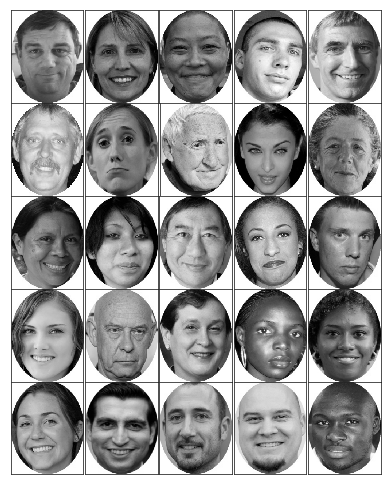

In [31]:
# grid view after resizing and conversion to grayscale (with publication-friendly images)

fig, ax = plt.subplots(grid_dim, grid_dim, figsize=( 200/(grid_dim*6), 256/(grid_dim*6) ))
plt.subplots_adjust(hspace=0, wspace=0)

for i in range(plot_n):
    plt.subplot(grid_dim,grid_dim,i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.imshow(X_resized_gray_public[i], cmap='gray') #, vmin=0, vmax=1)

In [32]:
# save results
save_path = '/Users/kacha/nf-ds/nf_capstone/data/'
np.save(save_path + 'Xrg.npy', X_resized_gray)
np.save(save_path + 'Xrg_public.npy', X_resized_gray_public)